In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations




In [2]:
paths = ['YH',  'W', 'P', 'w', 'tau',  'N', 'INC', 'inc',  'CT', 'CNT', 'p', 'E', 'PF_s', 'PF', 'CTH_s', 'i', 'ra', 'iF_s']
lvl_path = ['ra', 'i', 'iF_s']


In [3]:
model = IHANKModelClass(name='baseline')
model.par.nu = 1.0
model.par.eta_s = 0.5
# model.par.epsilon_ = 0.0
# model.par.gamma_ = 0.0
# model.par.gamma_ = model.par.epsilon_
model.par.etaF = 0.5
model.par.etaE = 0.1
model.par.float = True
model.par.pf_fixed = True
model.par.mon_policy = 'real'

model.find_ss(do_print=False)

model.compute_jacs()

shock_PE_s, shock_forigne_interest, shock_PF_s, shock_PF_s_taylor, shock_PE_PF, shock_PE_PF_taylor, shock_i = calculations.difine_shocks(model) 

Share of domestic workers in tradable sector = 0.50


/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1645: UserWarning: warning: variable U contains nan (blocks.HH_post)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1645: UserWarning: warning: variable U contains nan (blocks.HH_post)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')


In [4]:
# Paths 
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'PF', 'UC_TH_hh', 'UC_NT_hh', 'EX']
paths_hh = ['U_hh', 'CNT_hh', 'CT_hh', 'CTH', 'CTF', 'CNT', 'EX', 'inc_NT', 'inc_TH', 'ra']
paths_s = ['iF_s', 'rF', 'E', 'PF_s', 'PF', 'CTH_s', 'PTH_s']


In [5]:
model.find_transition_path(shocks=shock_PE_s, do_end_check=False)

/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1645: UserWarning: warning: variable U contains nan (blocks.HH_post)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')


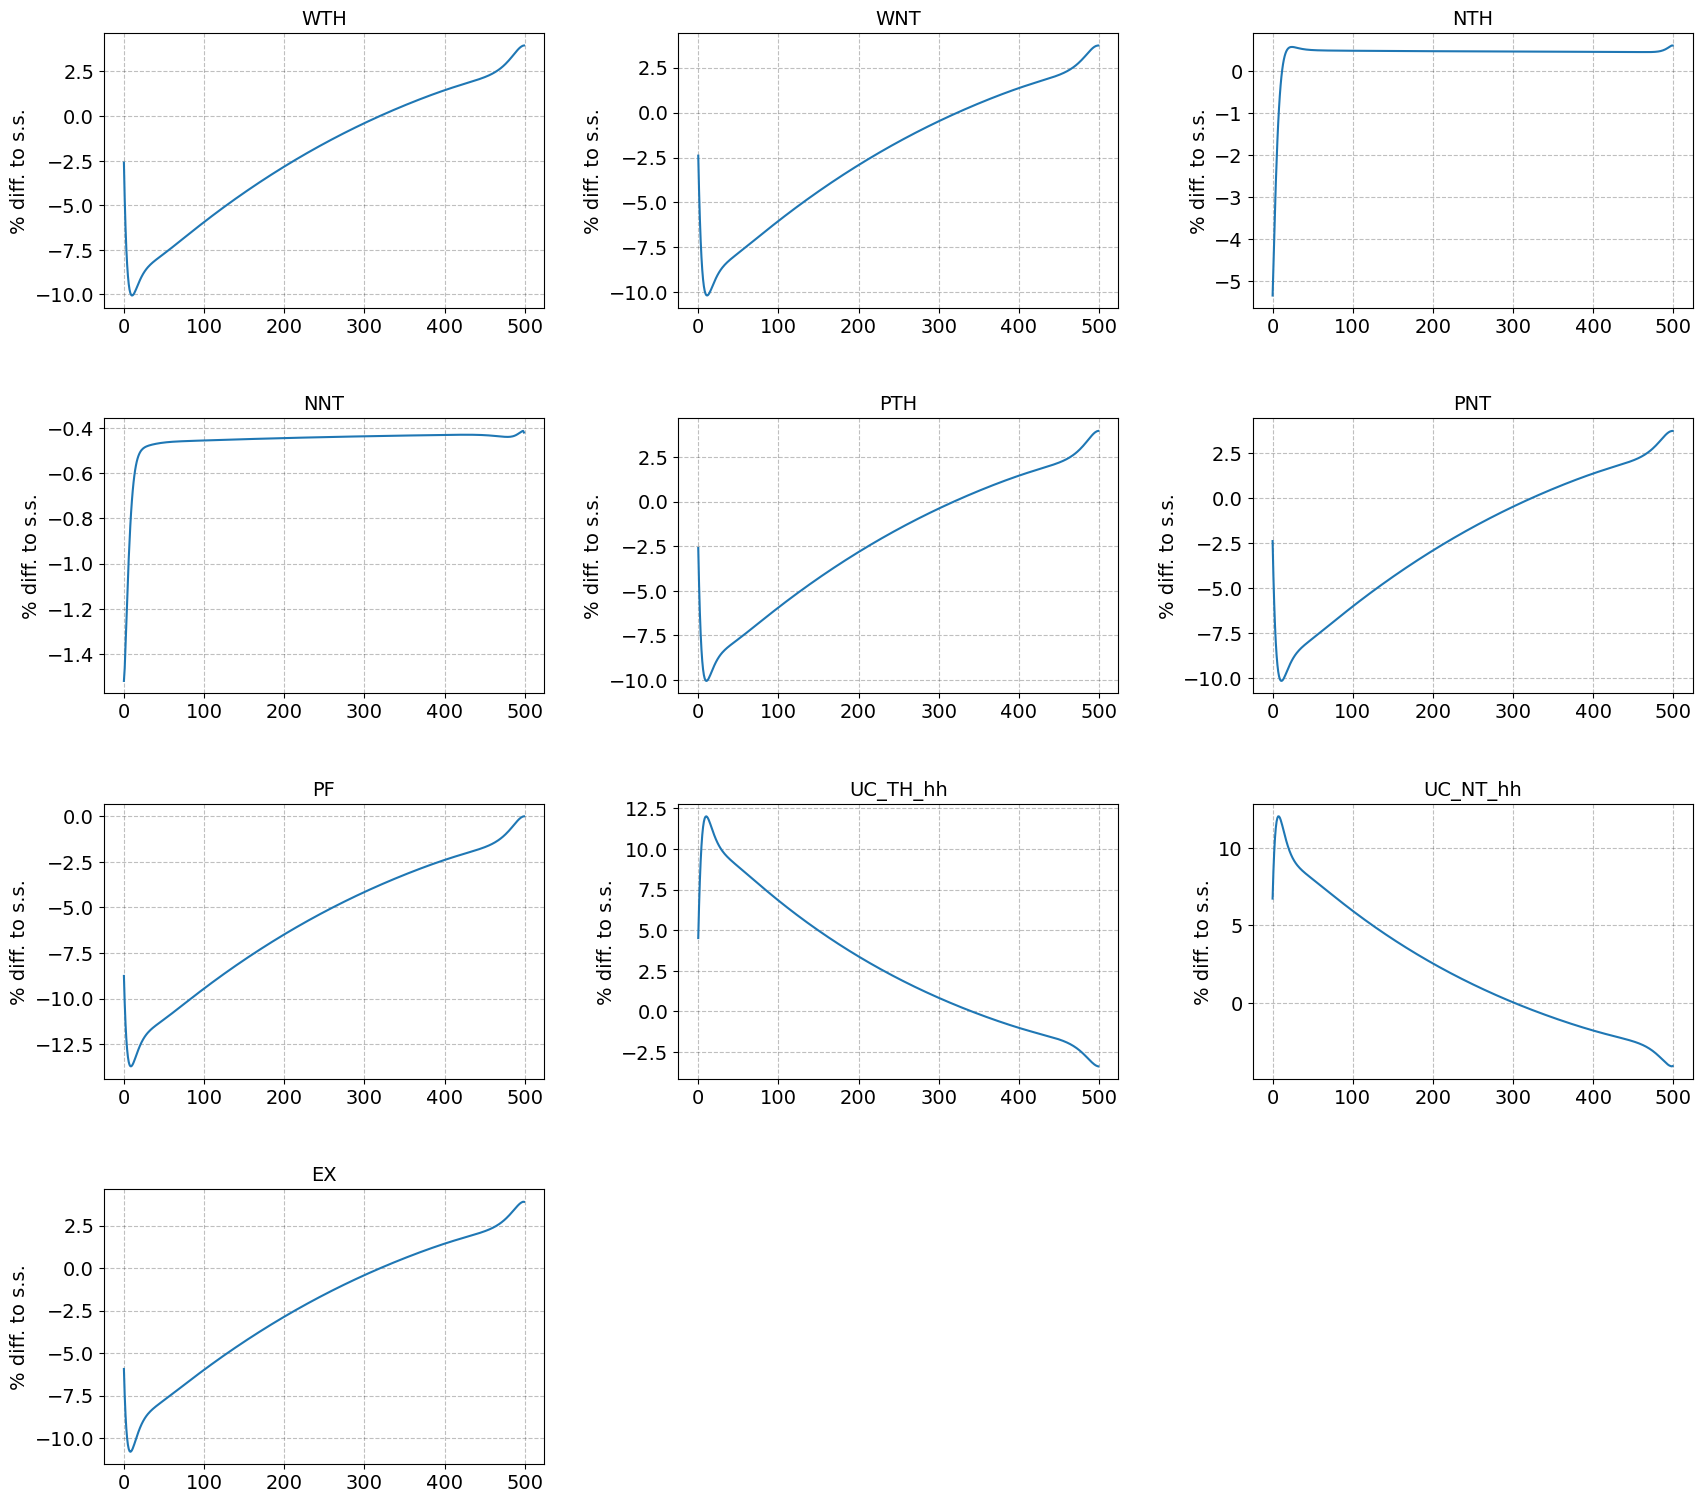

In [6]:
model.show_IRFs(path_philips, do_targets=False, do_shocks=False, T_max=500, ncols=3, lvl_value=lvl_path)


In [7]:
model_fixed = IHANKModelClass(name='float') 
model_fixed.par.float = False
model_fixed.find_ss()
model_fixed.compute_jacs()
model_fixed.find_transition_path(shocks=shock_PE_s, do_end_check=False)


Share of domestic workers in tradable sector = 0.50


/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1645: UserWarning: warning: variable U contains nan (blocks.HH_post)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1645: UserWarning: warning: variable U contains nan (blocks.HH_post)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/emmagundersen/GEModelTools/GEModelTools/GEModelClass.py:1645: UserWarning: warning: variable U contains nan (blocks.HH_post)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')


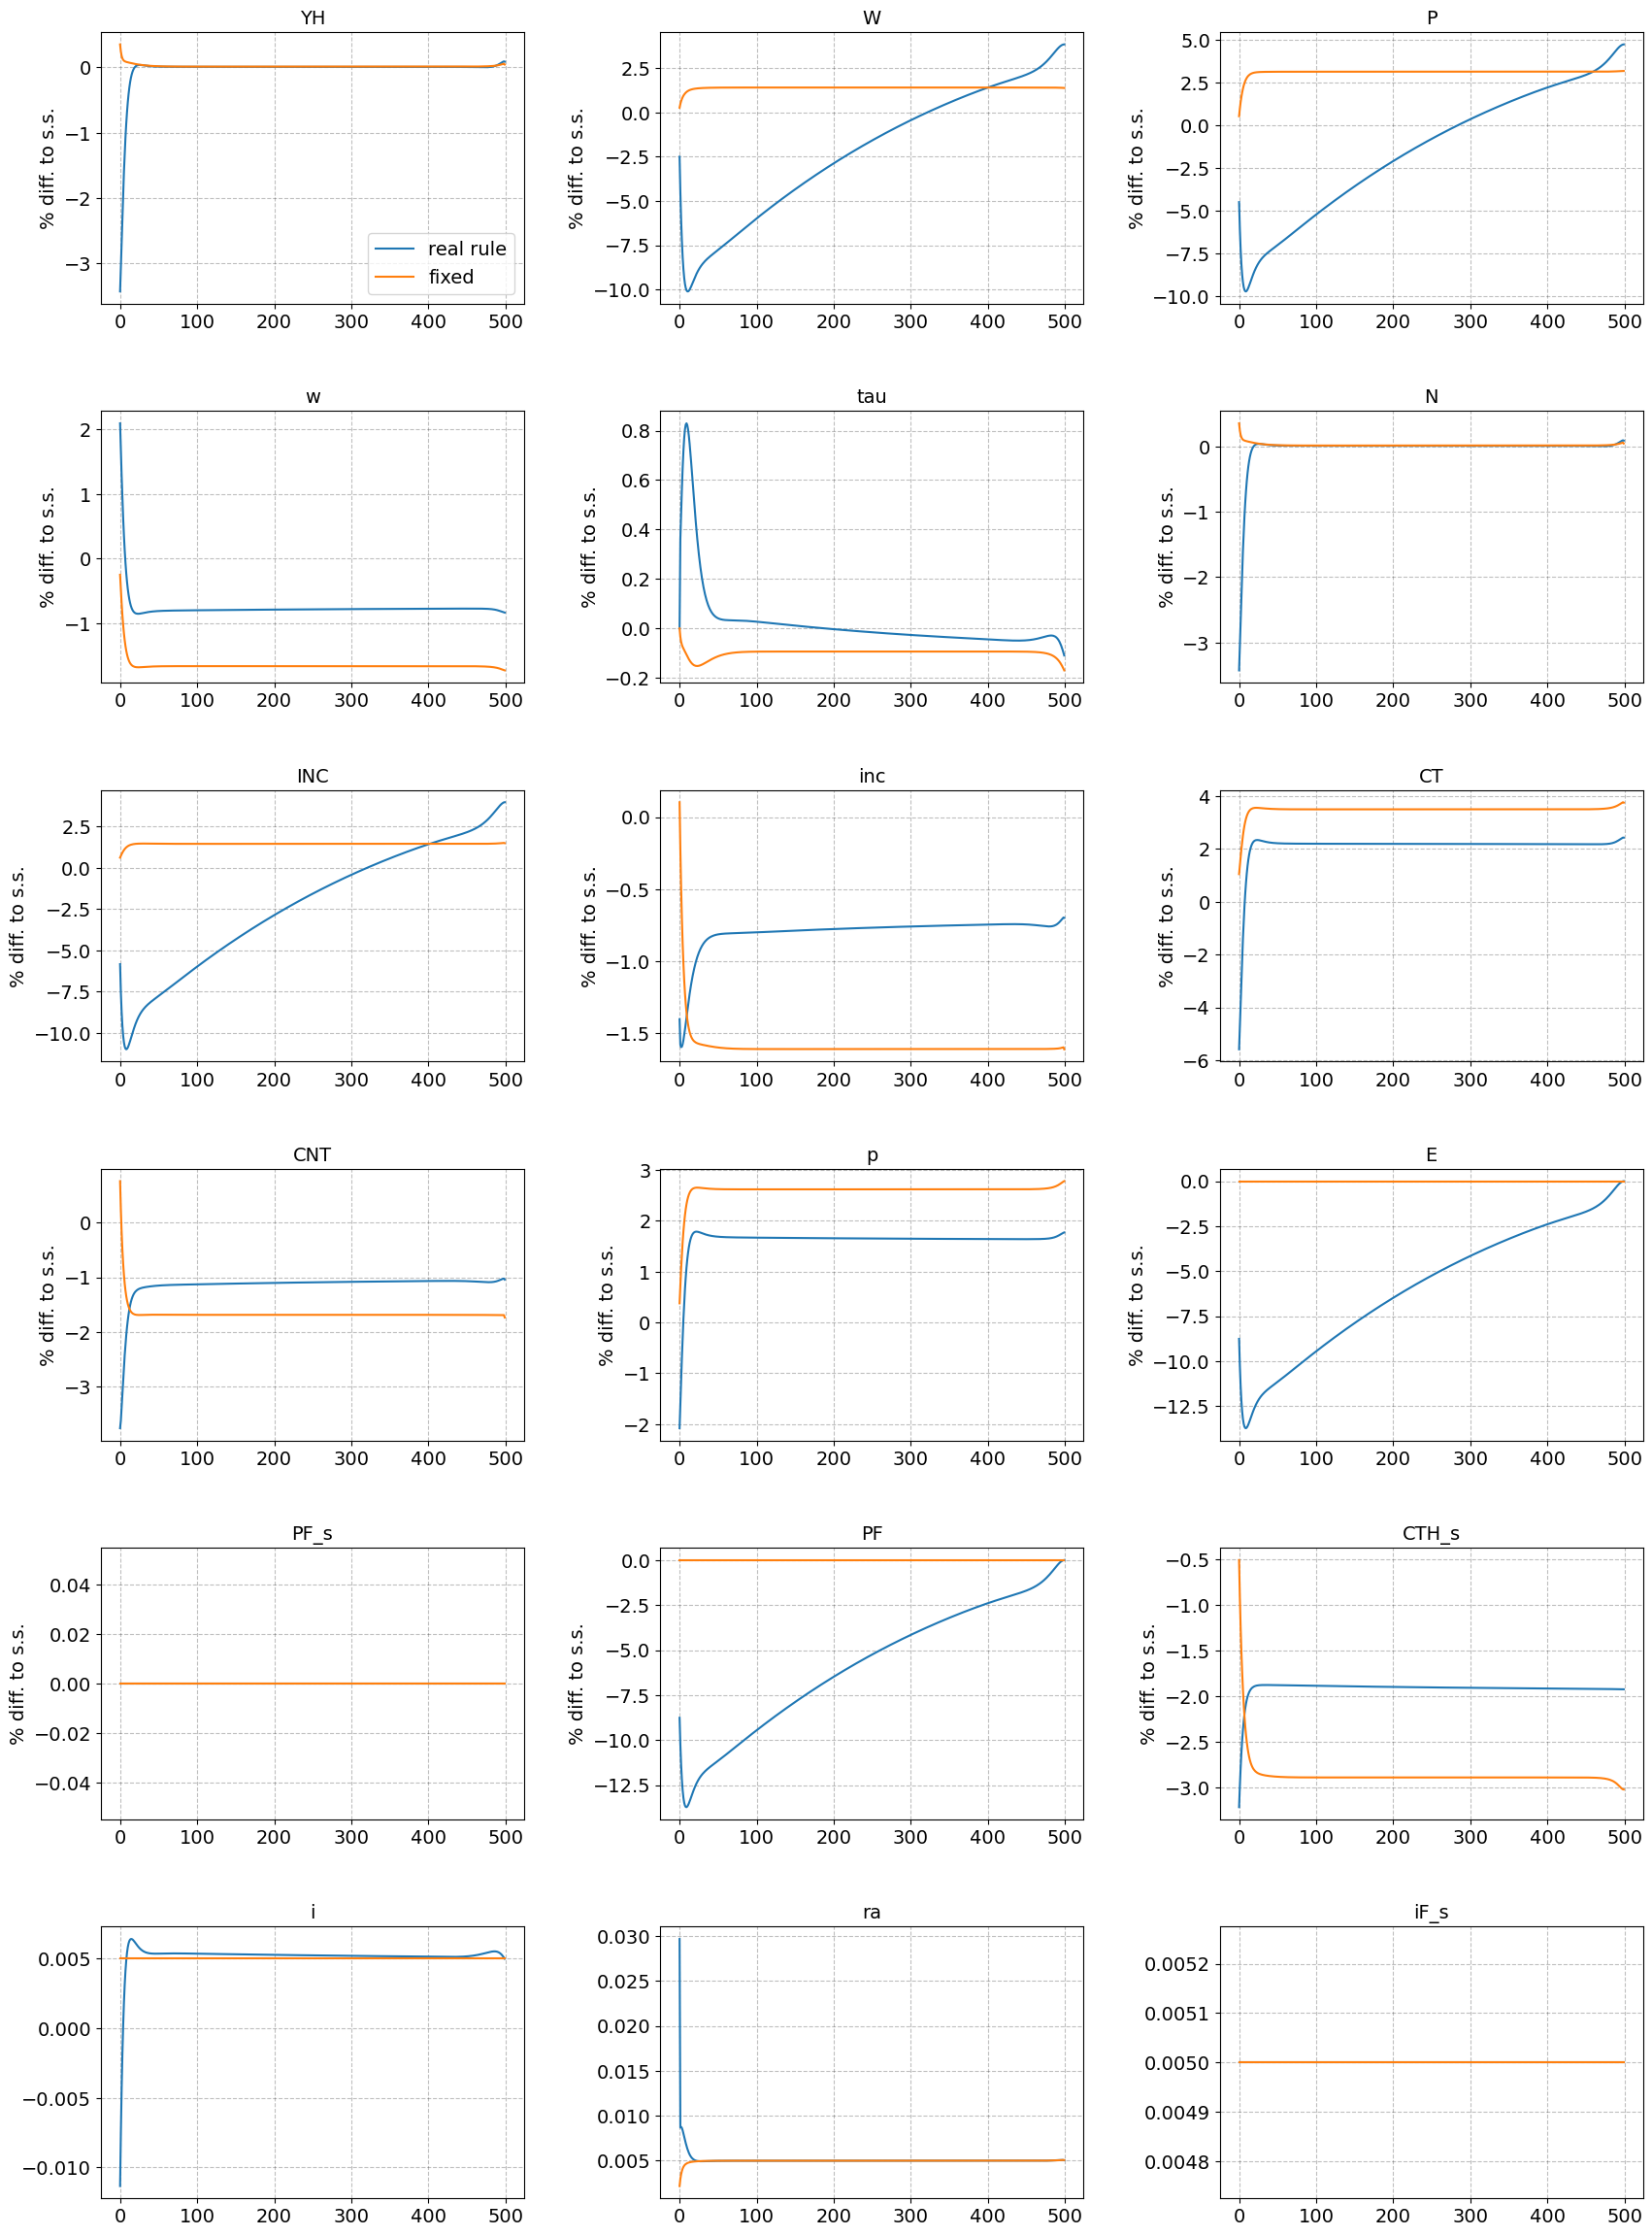

In [8]:
model.compare_IRFs([model, model_fixed], ['real rule', 'fixed'], paths, do_targets=False, do_shocks=False, T_max=500, ncols=3, lvl_value=lvl_path)

In [ ]:
PT_list = np.linspace(0.5, 1.5, 10)
PNT_list = np.linspace(0.5, 1.5, 10)


EXP = []
A = []
CT = []
CNT = []
CTH = []
CTF = []
CTHF = []
CE = []

for PNT in PNT_list:
    model.ss.PT = PNT
    model.solve_hh_ss()
    model.simulate_hh_ss()
    EXP.append(model.ss.E_hh*model.ss.PNT)
    A.append(model.ss.A_hh*model.ss.PNT)
    CT.append(model.ss.CT_hh)
    CNT.append(model.ss.CNT_hh)
    CTH.append(model.ss.CTH_hh)
    CTF.append(model.ss.CT_hh)
    CTHF.append(model.ss.CTHF_hh)
    CE.append(model.ss.CE_hh)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(PT_list, EXP, label='EXP')
ax.plot(PT_list, A, label='A')
# ax.plot(PT_list, CT, label='CT')
# ax.plot(PT_list, CNT, label='CNT')
# ax.plot(PT_list, CTH, label='CTH')
# ax.plot(PT_list, CTF, label='CTF')
# ax.plot(PT_list, CTHF, label='CTHF')
# ax.plot(PT_list, CE, label='CE')
ax.legend()


# Calculate expenditure 
exp_calc = CT*PT_list + CNT



In [ ]:
# ones
PNT_list = np.ones(10)
exp_calc = CT*PT_list + CNT*PNT_list

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(PT_list, EXP, label='EXP')  
ax.plot(PT_list, exp_calc, label='EXP calc')
ax.legend()


In [ ]:
model.show_IRFs(varnames=['A_hh', 'PT'], do_shocks=False, do_targets=False)

In [ ]:
model.find_transition_path(shocks=[])
model.show_IRFs(varnames=['A_hh', 'PT'], do_targets=False, do_shocks=False)

In [ ]:

model.path.PT

In [ ]:


model.show_IRFs(varnames=['A_hh', 'PT'], do_targets=False, do_shocks=False)

In [ ]:
model.simulate_hh_path()

In [ ]:
model.show_IRFs(varnames=['A_hh', 'PT'], do_targets=False, do_shocks=False)

In [ ]:
model.solve_hh_ss()
model.simulate_hh_ss()

In [ ]:
a_ = model.ss.a[0,3,:]*model.ss.PNT
e_ = model.ss.e[0,3,:]*model.ss.PNT
ect_ = model.ss.ct[0,3,:]*model.ss.PT
ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
share_ = ect_/(e_)

plt.figure()
plt.plot(e_,share_)
plt.xlabel('Total expenditure')
plt.ylabel('Expenditure share tradable goods')
plt.title('Non-homothetic expenditure shares')


In [ ]:

model_float = model.copy(name='Floating exchange rate')

model_float.find_transition_path(shocks=shock_PE_s, do_end_check=False)

model_float.show_IRFs(paths, T_max=50, ncols=3, lvl_value=lvl_path, do_shocks=True, do_targets=False)

In [ ]:
model.par.jump_i_shock = +0.025 # initial jump
model.par.rho_i_shock = 0.80 # AR(1) coefficeint
model.find_transition_path(shocks=['i_shock'], do_end_check=False)

In [ ]:
model.show_IRFs(paths, lvl_value=lvl_path, T_max=50, ncols=3, do_shocks=True, do_targets=False)

In [ ]:
model.find_transition_path(shocks=shock_i, do_end_check=False)

In [ ]:
model.show_IRFs(paths, lvl_value=lvl_path, T_max=50, ncols=3, do_shocks=True, do_targets=False)